# Import the modules we need

In [1]:
import pandas as pd #for data loading, manipulation and one hot encoding
import numpy as np #for data manipulation
import matplotlib.pyplot as plt #create data viz
import matplotlib.colors as colors

Import Scikit Learn Packages

In [2]:
from sklearn.utils import resample #download the dataset
from sklearn.model_selection import train_test_split #splits data into training and test sets
from sklearn.preprocessing import scale #scales and centers data
from sklearn.svm import SVC #creates support vector machine for classification
from sklearn.model_selection import GridSearchCV #does cross validation
from sklearn.metrics import confusion_matrix #creates confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay #draws confusion matrix
from sklearn.decomposition import PCA #perform pca to plot data

In [3]:
#Check path
import os
os.path.abspath("")

'C:\\Users\\Nardeep'

# Import the data

In [4]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [6]:
df = pd.read_excel('default of credit card clients.xls',
                header=1)

In [7]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


The columns are:
- ID, The ID of each customer
- LIMIT_BAL, Credit Limit
- SEX
- EDUCATION, Level of Education
- MARRIAGE, Marital Status
- AGE
- PAY_, When last 6 bills were paid
- BILL_AMT, What last 6 bills were
- Pay_AMT, What last payments were
- default payment next month

NOTE: we will change the last column name to default
    

In [8]:
df.rename({'default payment next month' : 'DEFAULT'}, axis='columns', inplace=True)

In [9]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
df.drop('ID', axis=1, inplace=True) #we will remove ID column as it not useful
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [13]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

Information about the data from the site as we can see everything is int64:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit

SEX: 1 = male 
     2 = female
     
EDUCATION: 1 = graduate school
           2 = university 
           3 = high school 
           4 = others
           
MARRIAGE: 1 = married 
          2 = single 
          3 = others
          
AGE: Age (year)


PAY_: -1 = pay duly 
       1 = payment delay for one month 
       2 = payment delay for two months
       . . . 
       8 = payment delay for eight months 
       9 = payment delay for nine months and above

BILL_AMT: 
Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005

PAY_AMT: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005

DEFAULT:
       Defaulted = 1 
       Did not default = 0

In [14]:
#let's check distinct values in sex
df['SEX'].unique()

array([2, 1], dtype=int64)

In [15]:
#check values in education
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [16]:
#check values in education
df['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

As there are 0 in marriage and education these could infer missing values and education has 5 and 6 which might be other education levels, let's go for it with these assumptions and see what happens

Scikit-learn support vector machines do not support missing values in the datasets, so if we have a very small number of 0's 
we can omit them from dataset

In [17]:
len(df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE']==0)])

68

In [19]:
len(df)

30000

68 out of 30000 is very low so let's ignore these rows

In [20]:
df_no_missing = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]

In [21]:
len(df_no_missing)

29932

# Downsample the Data 

Support Vector Machines work best with smaller datasets, so we will reduce the size so we can optimize with Cross Validation,
Split the data between defaulted and not defaulted

In [22]:
df_no_default = df_no_missing[df_no_missing['DEFAULT'] == 0]
df_default = df_no_missing[df_no_missing['DEFAULT'] == 1]

In [23]:
len(df_no_default)

23301

In [24]:
len(df_default)

6631

Now let's downsample the separate dataframes

In [28]:
df_no_default_downsampled = resample(df_no_default,
                                    replace=False,
                                    n_samples=1000,
                                    random_state=42)
len(df_no_default_downsampled)

1000

In [29]:
df_default_downsampled = resample(df_default,
                                    replace=False,
                                    n_samples=1000,
                                    random_state=42)
len(df_default_downsampled)

1000

let's merge the 2 datasets into 1

In [31]:
df_downsample = pd.concat([df_no_default_downsampled, df_default_downsampled])
len(df_downsample)

2000

# Format data for SVM

In [33]:
X = df_downsample.drop('DEFAULT', axis =1).copy()
X.head() #this set is to make predictions so we do not want default there as it needs to predict default

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,...,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,...,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [34]:
y=df_downsample['DEFAULT'].copy()
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: DEFAULT, dtype: int64

# Format data for One-Hot Encoding

We need to split marriage for example as it's not continious data, 3 would be nearer 2 even though they have zero relation to each other

In [38]:
pd.get_dummies(X, columns=['MARRIAGE'], dtype='int').head()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
641,130000,2,3,28,0,0,0,0,-2,-2,...,0,2500,1000,0,0,0,0,1,0,0
4678,170000,1,3,29,0,0,0,0,0,0,...,33862,7200,7500,1200,1200,1500,1300,1,0,0
16004,180000,2,2,29,0,0,0,0,0,0,...,26176,1800,1800,1500,1056,950,1000,1,0,0
22974,210000,2,2,32,-2,-2,-2,-2,-2,-2,...,0,979,412,0,0,0,0,0,1,0
17535,190000,2,3,45,0,0,0,0,0,0,...,84811,3300,3331,3359,2663,2751,3000,1,0,0


This needs to be done for all categorical columns to eliminate any sort of standard data nuances

In [40]:
X_encoded = pd.get_dummies(X, columns=['SEX',
                                      'EDUCATION',
                                      'MARRIAGE',
                                      'PAY_0',
                                      'PAY_2',
                                      'PAY_3',
                                      'PAY_4',
                                      'PAY_5',
                                      'PAY_6'], dtype='int')
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,...,0,1,0,0,0,0,0,0,0,0
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,0,0,0,1,0,0,0,0,0,0
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,0,0,0,1,0,0,0,0,0,0
22974,210000,32,355,975,410,0,0,0,979,412,...,0,1,0,0,0,0,0,0,0,0
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,0,0,0,1,0,0,0,0,0,0


# Format the Data for Centering and Scaling

The Radial Basis Function (RBF) that we are using in our SVM assumes that the data is centered ans scaled, so each column should have a mean value = 0 and standard deviation =1, needs to be done in training amd test datasets.

We split the data into training and testing and then scale to avoid data leakage. Data leakage occurs when information about the training dataset corrupts or influences the testing dataset

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

# Build a Premlimiary Support Vector Machine

In [44]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

We have built a SVM for classification, let's see how it performs on the Testing Dataset and draw a Confusion Matrix

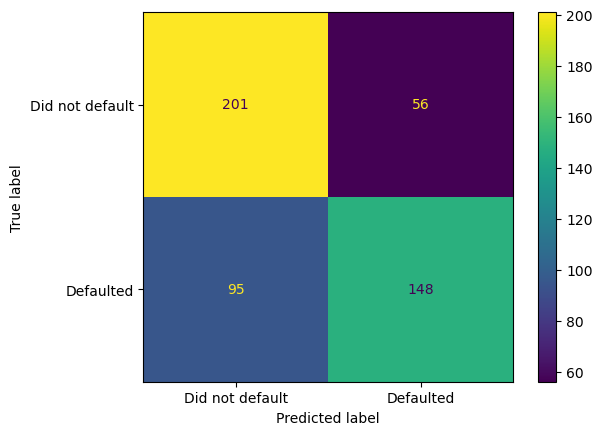

In [62]:
ConfusionMatrixDisplay.from_estimator(
    clf_svm,
    X_test_scaled,
    y_test,
    values_format='d',
    display_labels=["Did not default", "Defaulted"]
)

We can see that 201 out of 257 were correctly classified (79%) and of the 243 that defaulted 148 were correctly classified (61%), the SVM wasn't too accurate, let's see if cross validation will help optimize the parameters

# Optimize Parameters with Cross Validation and GridSearchCV()

Optimizing a SVM will give us the best value for gamma and thr regularization parameter,C.
We will use GridSearchCV() as we have 2 parameters to optimize

In [63]:
param_grid = [
    {'C': [0.5,1,10,100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']}, #rbf is best performing
]

optimal_params = GridSearchCV(
        SVC(),
        param_grid,
        cv=5,
        scoring='accuracy',
        verbose=0
    )

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


Optimal values are: 'C': 100, 'gamma': 0.001, 'kernel': 'rbf'

# Build with new params

In [64]:
clf_svm = SVC(random_state=42, C=100, gamma=0.001)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=100, gamma=0.001, random_state=42)

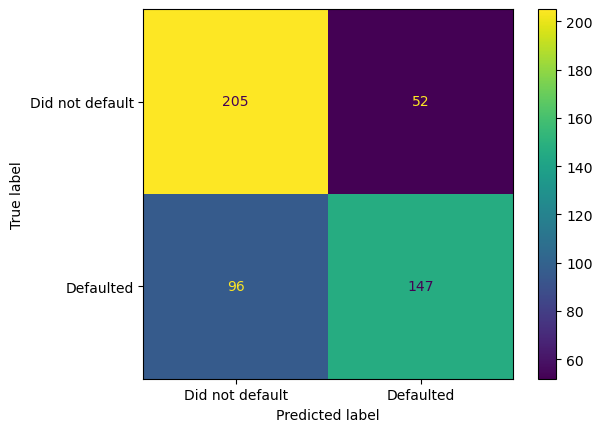

In [65]:
ConfusionMatrixDisplay.from_estimator(
    clf_svm,
    X_test_scaled,
    y_test,
    values_format='d',
    display_labels=["Did not default", "Defaulted"]
)

Results were slightly better for not defaulting by 4 people while defaulting was slightly worse by 1 person

In [66]:
#let's check the dimensions of our data
len(df_downsample.columns)

24

We need to scale down as we can't plot this on a 24 dimensional graph, let's see if we can scale down to a 2 dimensional graph using PCA (Principal Component Analysis)

-we can use a scree plot to see how accurate our scaling down of the graph would be (we will need 2 dimensions to stand above all others for it to be useful)

AttributeError: module 'matplotlib.pyplot' has no attribute 'ticks_params'

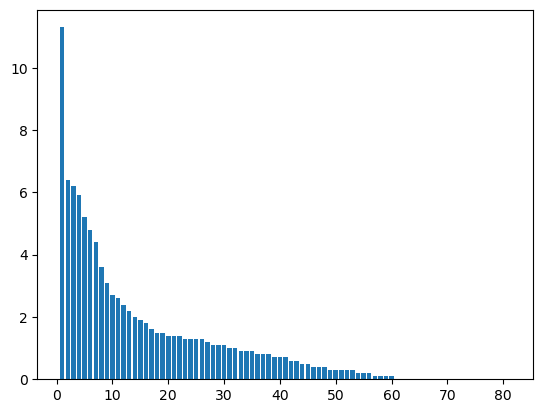

In [67]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.ticks_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
plt.ylabel('% of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

This Scree plot shows only PC1 is what we need as it's the only one accurately reflects the original data the rest do not, so we can't really go further with this.